In [6]:
import plotter
from matplotlib import pyplot as plt

# Module Breakdown:
There are two modules I wrote for doing this stuff, `logmanipulator` and `plotter`. The latter uses the former under the hood.

`logmanipulator` is most useful in that it provides a thin wrapper around the built-in csv module's `csv.DictReader`. Namely, the `logmanipulator.dictReaderWrapper()` function returns a `DictReader` object, but which was created with the knowledge that the first 8 lines of the logfile csv are unit definitions, and not actually data we are interested in analysing (otherwise, the native csv library produces a mangled `DictReader` object).

`plotter` has a function called `processToBigDict()` which reads out an entire csv file (from a provided `DictReader` object) and produces a large dict in the format that pyplot likes (it can be directly passed to the `matplotlib.pyplot.plot()` function as the `data` argument). From there, all you need to do is specify which axes you are interested in plotting.

`plotter` has a further function that combines everything into a single call; it takes a list of file names, reads each one, extracts only the axes it's interested in, and then deallocates the memory allocated to the file buffer before plotting this data. This allows you to plot a lot of logs simultaneously without causing your computer to potentially take a while to do this (if the computer has an HDD and you try to plot megabytes worth of logfiles simultaneously by opening them all end then plotting them, the computer may start to swap memory which makes the operation take a while). The downside of this is that you lose freedom in terms of how you plot the logs; however, I am working on giving an option to pass these formatting etc options directly into `plotter.plotLog()`.

## Observations:
`20210825 _CVD_Control_LogFile.csv` has a few weird "mistake" lines where the day/month are reversed (search for 8/25), the timestamp includes a PM value, and the date and time are not comma-delimited.
### TODO:
* discuss this with Sacha and figure out what is going on
* allow for plotting of multiple parameters

# Analysis Demonstration
Here is an example of how to use the plotter. Just put all the paths to the csv files in a list, and run plotLog on the list.

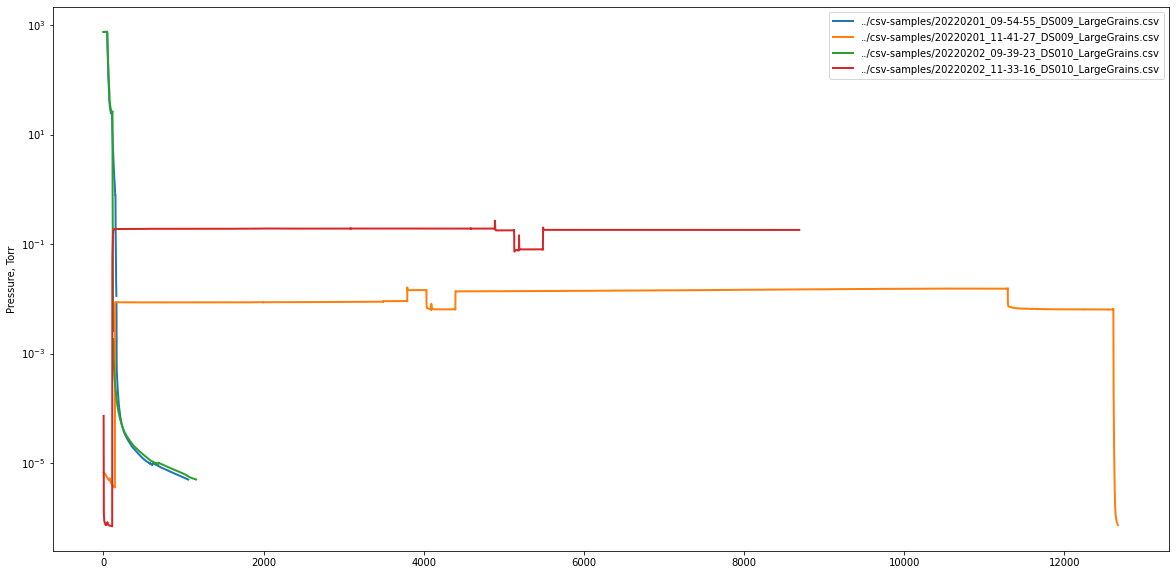

In [10]:
#files = ['../csv-samples/20210827 _CVD_Control_LogFile.csv',
 #        '../csv-samples/20210826 _CVD_Control_LogFile.csv',
 #        '../csv-samples/20210824 _CVD_Control_LogFile.csv']
files = ["../csv-samples/20220201_09-54-55_DS009_LargeGrains.csv",
        "../csv-samples/20220201_11-41-27_DS009_LargeGrains.csv",
         "../csv-samples/20220202_09-39-23_DS010_LargeGrains.csv",
         "../csv-samples/20220202_11-33-16_DS010_LargeGrains.csv"
        ]

f = plt.figure()
f.set_figwidth(20)
f.set_figheight(10)
plotter.plotLog(files, linewidth=2, figure=f)

To plot both the pressure and the temperature, run `plotPressureAndTemp` as below. Pressure and temperature are plotted in the same color.

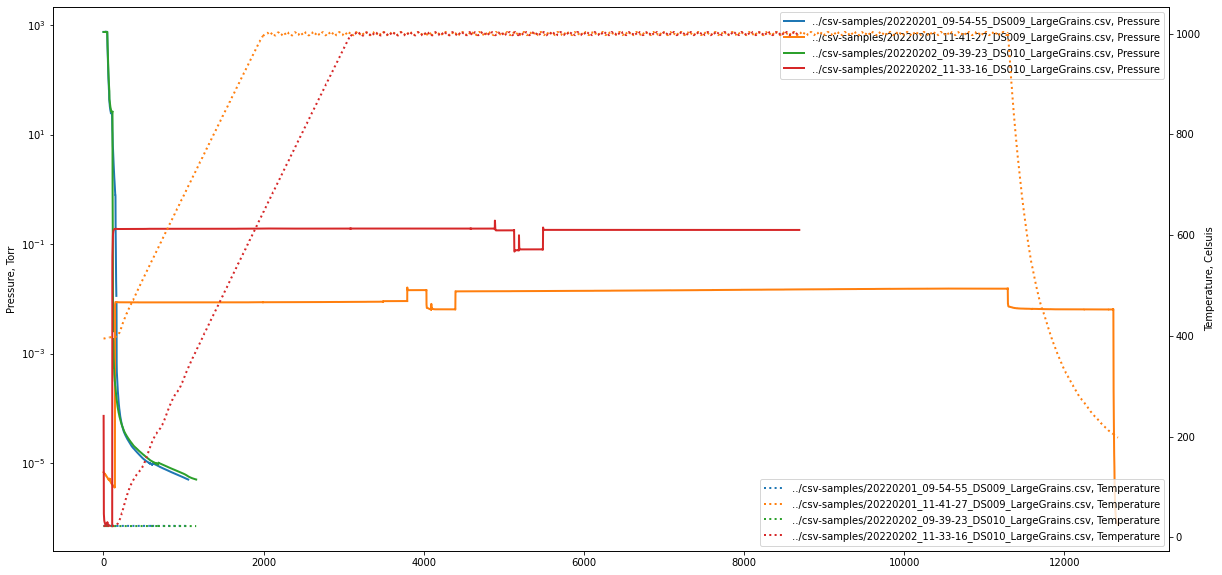

In [11]:
plotter.plotPressureAndTemp(files, linewidth=2)

Alternatively, you can use `logmanipulator` and `plotter` to manipulate the log files, to make it easier for you to plot directly with pyplot if you want to modify formatting etc yourself:

In [4]:
fig, pressure = plt.subplots()

temperature = pressure.twinx()

pressure.plot(bigDict["runtime"], bigDict["A3 (974)"], 'g-')
temperature.plot(bigDict["runtime"], bigDict["Effective Temperature Oven"], 'b-')

pressure.set_xlabel('Runtime')
pressure.set_ylabel('Pressure', color='g')
temperature.set_ylabel('Temperature', color='b')
plt.show()

NameError: name 'plt' is not defined

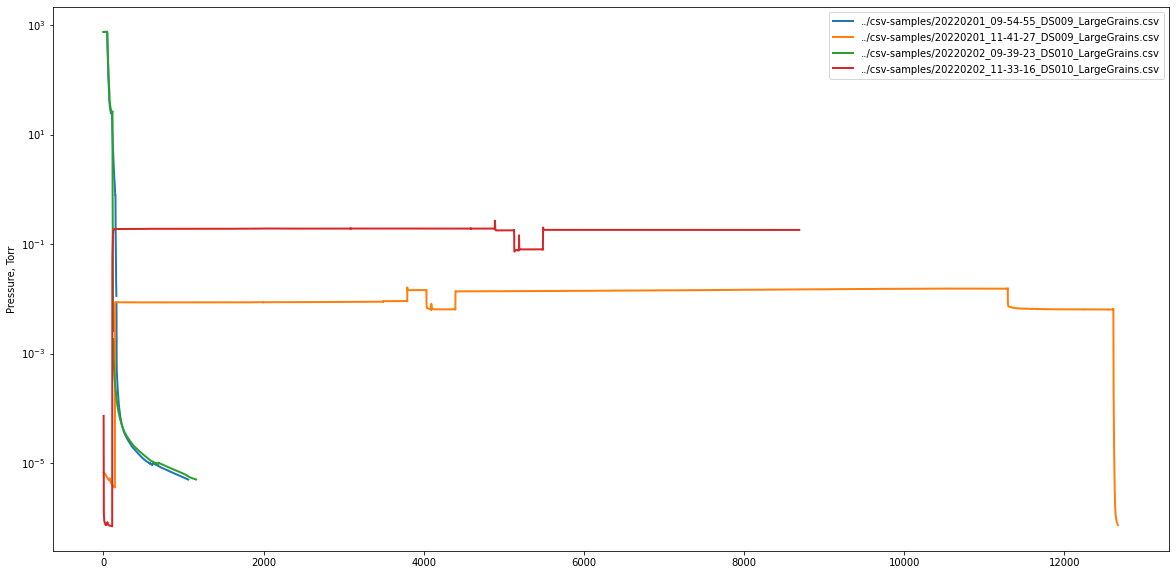

In [9]:
from matplotlib import pyplot as plt

f = plt.figure()
f.set_figwidth(20)
f.set_figheight(10)
plt.yscale("log")
plotter.plotLog(files, linewidth=2)